# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = D<(Ax-y)^T(Ax-y)> = 2(Ax-y)^TAdx$$
$$ ∇ f(x) = 2A^T(Ax-y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax-y) = 0$$
$$ A^TAx - A^Ty = 0 $$
$$ A^TAx = A^Ty $$
$$ x = (A^TA)^{-1}A^Ty$$

### 2.1 Реализация прямого решения

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

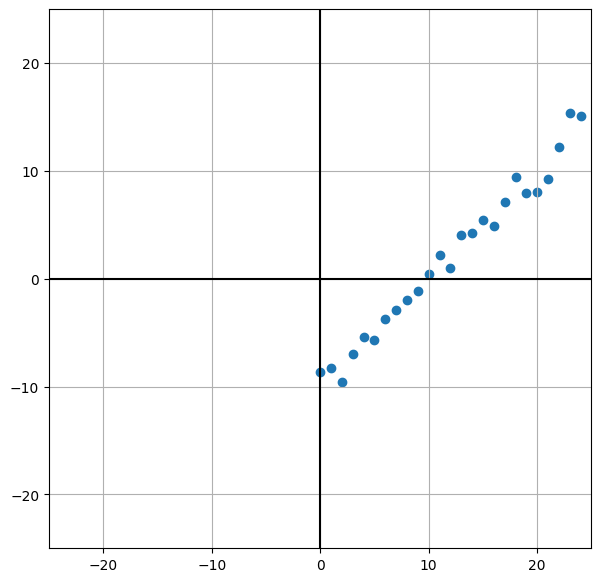

In [ ]:
# ваши параметры по вариантам
a_orig = 1 # по формуле (-1)^n * 0.1 * n, n - номер в списке группы (-1)^10 * 0.1 * 10 = 1
b_orig = -10 # по формуле n*(-1)^(n+1), где n - номер в списке группы 10 * (-1)^(11) = -10
random_state = 10 # х, где х - номер в списке группы

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [ ]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([-8.6684135 , -8.28472103, -9.54540029, -7.00838385, -5.37866403,
        -5.72008556, -3.73448841, -2.89145147, -1.99570857, -1.17460021,
         0.43302619,  2.20303737,  1.03493433,  4.02827408,  4.22863013,
         5.44513761,  4.86339779,  7.13513688,  9.484537  ,  7.92019511,
         8.02227172,  9.2566277 , 12.26607016, 15.38496733, 15.12369125]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - в формуле линейной регрессии присутствует свободный член bias, мы его дописываем к матрице с иксами, чтобы при подборе весов итоговая формулы выглядела
    w1 * x1 + w2 * x2 + ... + bias = y;

In [ ]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.inv(A.T @ A)@A.T@y
a_b_analytical

array([ 0.9994002 , -9.89568174])

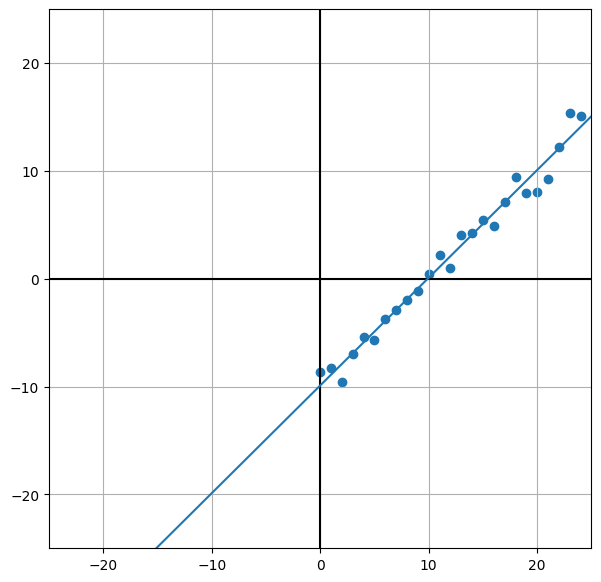

In [ ]:
# постройте линию которая вышла рядом с изначальными данными


# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
x_line = np.array([-25, 25])
y_line = a_b_analytical[0] * x_line + a_b_analytical[1]
ax.plot(x_line, y_line)

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

In [ ]:
y

array([-8.6684135 , -8.28472103, -9.54540029, -7.00838385, -5.37866403,
       -5.72008556, -3.73448841, -2.89145147, -1.99570857, -1.17460021,
        0.43302619,  2.20303737,  1.03493433,  4.02827408,  4.22863013,
        5.44513761,  4.86339779,  7.13513688,  9.484537  ,  7.92019511,
        8.02227172,  9.2566277 , 12.26607016, 15.38496733, 15.12369125])

[ 0.57125117 -9.31785323]


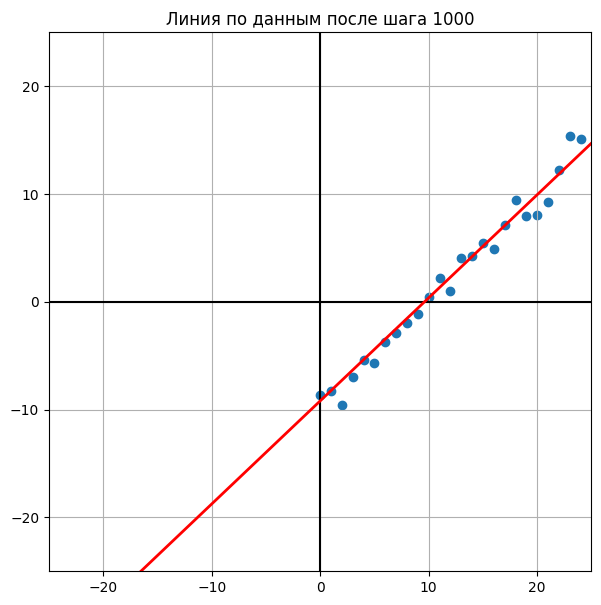

In [ ]:
alpha = 0.0002

a_b_analytical = np.array([0.0, 0.0])

for i in range(1000):
    # получаем градиент
    grad = 2 * A.T @ (A @ a_b_analytical - y)
    # получаем антиградиент
    antigrad = -grad
    # обновляем наши параметры линии
    a_b_analytical += alpha * antigrad

    # рисуем результат текущего шага
print(antigrad)
    #  - изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

x_line = np.array([-25, 25])
y_line = a_b_analytical[0] * x_line + a_b_analytical[1]

    # нарисовать линию
plt.plot(x_line, y_line, 'r-', linewidth=2,
            label=f'y = {a_b_analytical[0]:.3f}x + {a_b_analytical[1]:.3f}')
    # - линия которая обучилась
    #ax.plot([-25, 25], [..., ...])
ax.set_title(f'Линия по данным после шага {i+1}')
plt.show()